In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('weatherHistory.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df = df[['Temperature (C)', 'Humidity']]
df

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83
...,...,...
96448,26.016667,0.43
96449,24.583333,0.48
96450,22.038889,0.56
96451,21.522222,0.60


In [5]:
df.rename(columns={
    'Temperature (C)': 'Temperature'
}, inplace=True)

In [6]:
df.isnull().sum()

Temperature    0
Humidity       0
dtype: int64

In [7]:
df.isna().sum()

Temperature    0
Humidity       0
dtype: int64

In [8]:
df.duplicated().sum()

37368

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(59085, 2)

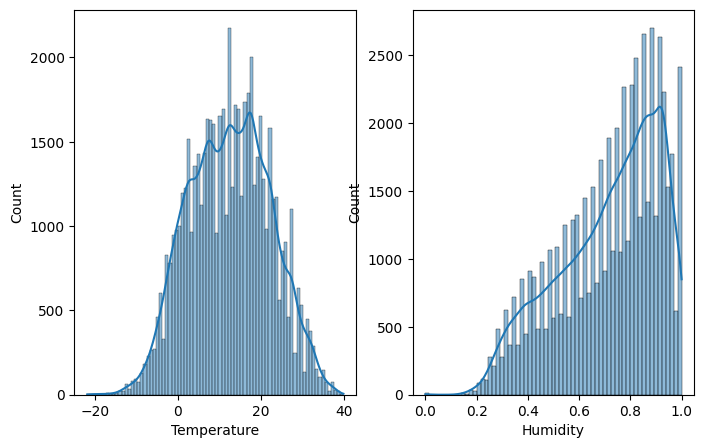

In [12]:
fig = plt.figure(figsize=(8,5))
for i in range(len(df.columns)):
    col = df.columns[i]
    sub = fig.add_subplot(1,2,i+1)
    sns.histplot(data=df, x=col, kde=True)

<Axes: xlabel='Temperature', ylabel='Humidity'>

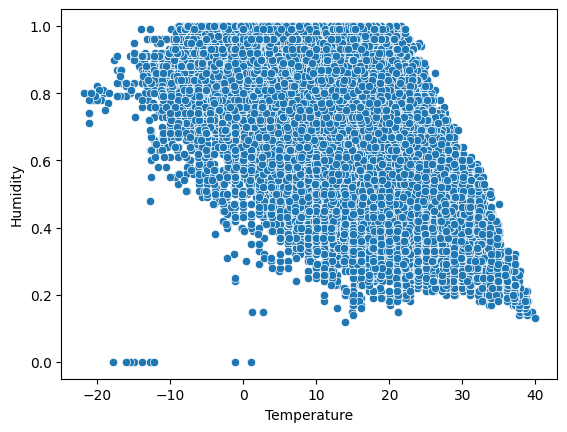

In [ ]:
sns.scatterplot(data=df, x='Temperature', y='Humidity')

In [15]:
X = df[['Temperature']]
y = df[['Humidity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.index

Index([91934, 87970, 17751, 11189, 20089,  7729, 18519,  7645, 67203, 92368,
       ...
       20101,  7008, 89013, 12992, 69127, 87936, 56981,   883, 18667, 91752],
      dtype='int64', length=47268)

In [16]:
X_test.index

Index([56942,   850,  5112, 40742, 22542, 91186, 73121, 52335, 83909, 51408,
       ...
       22296, 13861,  1159, 17304, 89173, 77895, 44348,  8978, 42084,  5859],
      dtype='int64', length=11817)

In [17]:
linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = linear.predict(X_test)

In [19]:
print(linear.intercept_)

[0.87023282]


In [20]:
print(linear.coef_)

[[-0.01225297]]


In [23]:
print(f'r2_score: {r2_score(y_test, y_pred)}')
print(f'mean_absolute_error: {mean_absolute_error(y_test, y_pred)}')
print(f'mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'root_mean_squared_error: {root_mean_squared_error(y_test, y_pred)}')

r2_score: 0.36382880743903756
mean_absolute_error: 0.1260772838953629
mean_absolute_percentage_error: 790433242381.8206
root_mean_squared_error: 0.15594186350617562


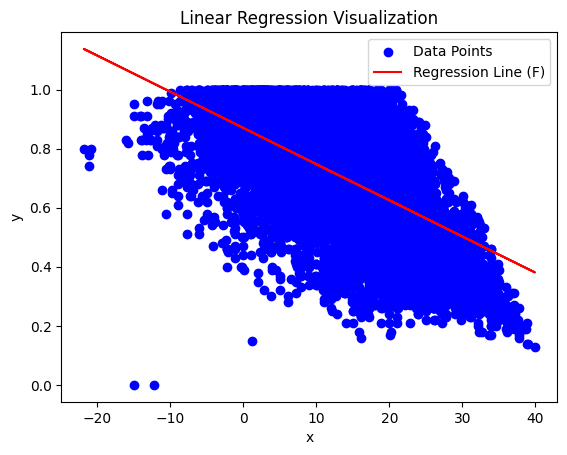

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Data Points')  # Các điểm dữ liệu thực tế
plt.plot(X_test, y_pred, color='red', label='Regression Line (F)')  # Đường hồi quy
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Visualization')
plt.show()